In [1]:
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

output_dir = Path('../outputs/article')
output_dir.mkdir(parents=True, exist_ok=True)

print(f'Output directory: {output_dir}')

Output directory: ../outputs/article


In [2]:
# Load predictions cache ONCE
print('Loading predictions cache...')
predictions_df = pd.read_pickle('../data/processed/predictions_cache.pkl')
print(f'✓ Loaded {len(predictions_df):,} shots with predictions')

Loading predictions cache...
✓ Loaded 86,558 shots with predictions


/home/jaime/FD/xG/notebooks/../src/visualization/timeline_phases.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: ../outputs/article/timeline_phases.png


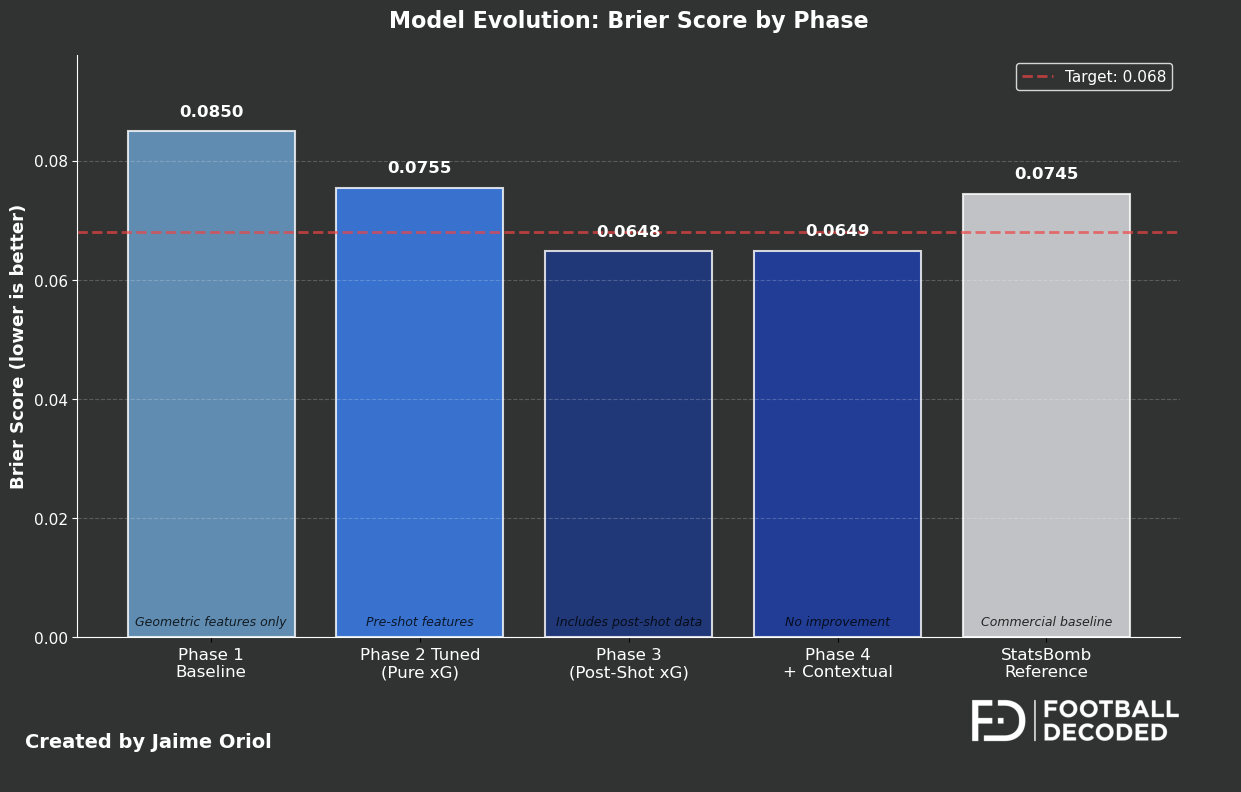

In [3]:
from src.visualization.timeline_phases import plot_timeline_phases

fig = plot_timeline_phases(output_path=output_dir / 'timeline_phases.png')
plt.show()

/home/jaime/FD/xG/notebooks/../src/visualization/feature_importance.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: ../outputs/article/feature_importance.png


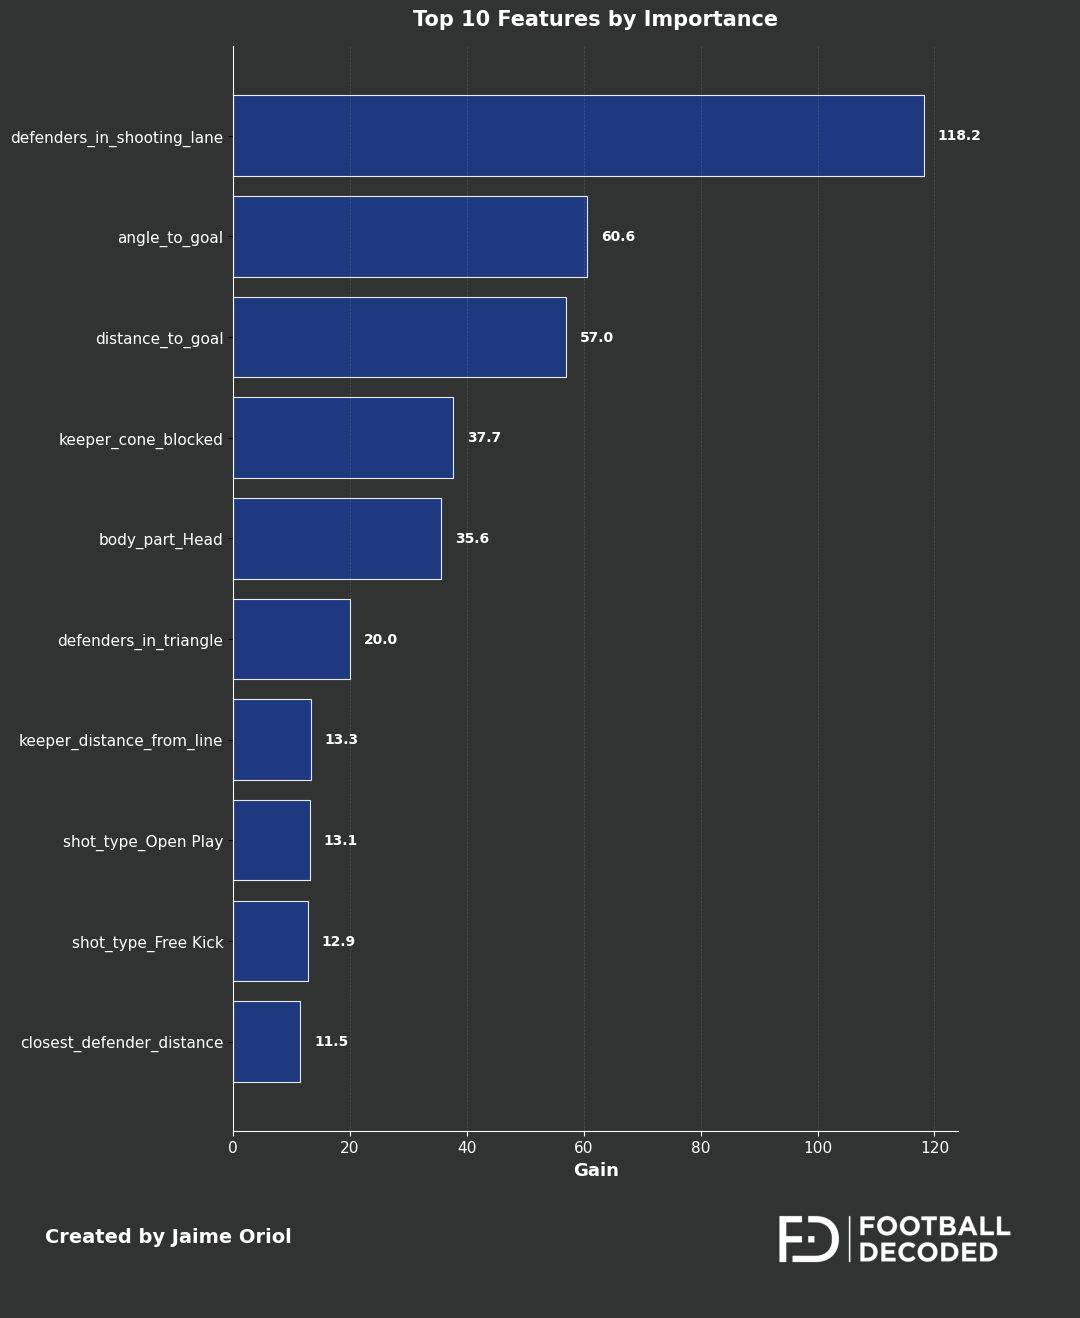

In [4]:
from src.visualization.feature_importance import plot_feature_importance

fig = plot_feature_importance(
    model_path='../models/phase2_tuned.json',
    output_path=output_dir / 'feature_importance.png'
)
plt.show()

/home/jaime/FD/xG/notebooks/../src/visualization/comparison_scatter.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: ../outputs/article/comparison_scatter.png


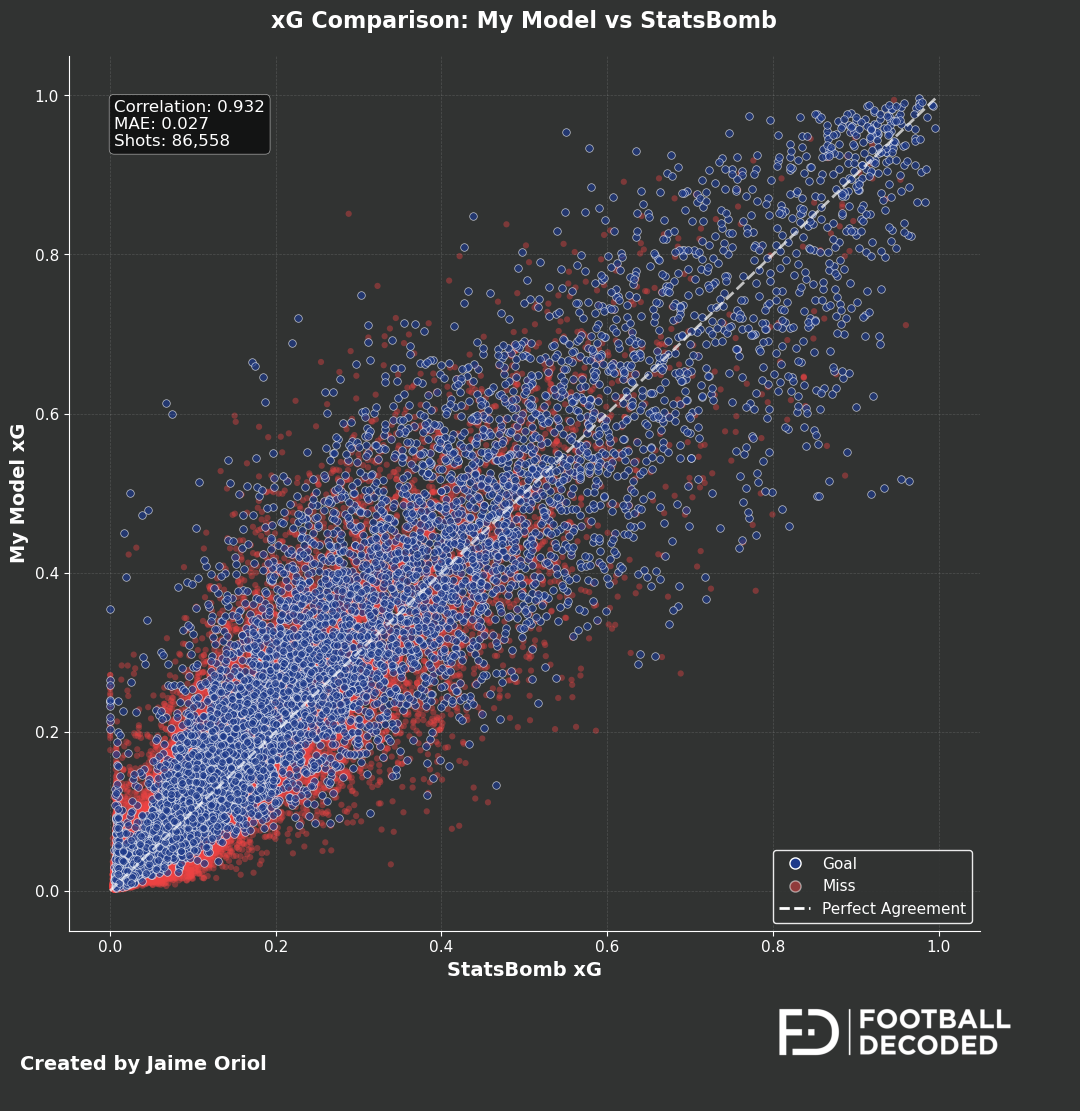

In [5]:
from src.visualization.comparison_scatter import plot_comparison_scatter

fig = plot_comparison_scatter(
    predictions_df=predictions_df,
    output_path=output_dir / 'comparison_scatter.png'
)
plt.show()

/home/jaime/FD/xG/notebooks/../src/visualization/shot_xg.py:258: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig.text(0.73, 0.925, f"{int(selected_shots.count()[0])}", fontweight="regular", fontsize=10, color='w', fontfamily=font)
/home/jaime/FD/xG/notebooks/../src/visualization/shot_xg.py:273: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shot_count = selected_shots.count()[0]


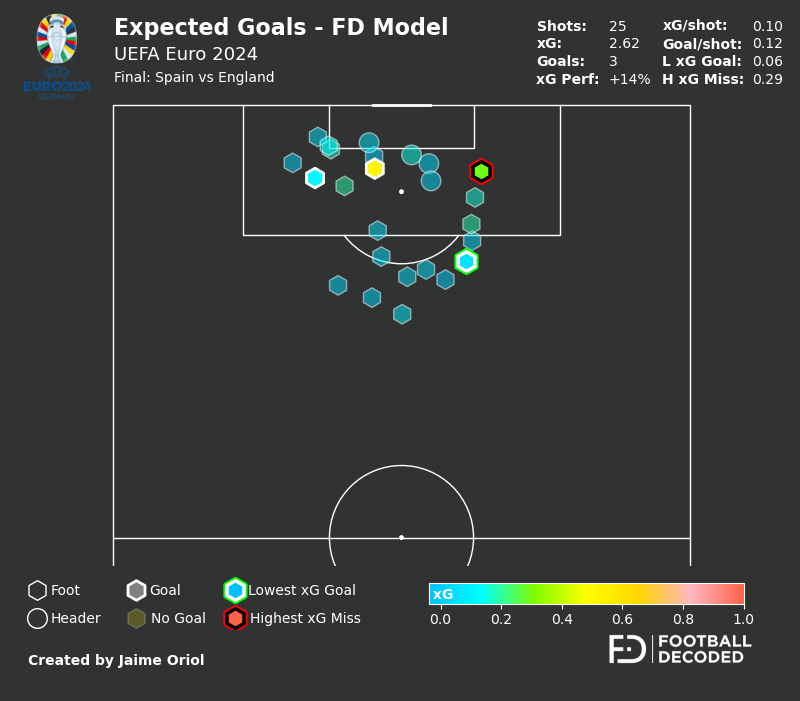

In [6]:
# Euro 2024 Final - Football Decoded Model (Phase 2)
# Spain 2-1 England - July 14, 2024
from src.visualization.shot_xg import plot_shot_xg

# Filter to Euro 2024 final only
euro_final = predictions_df[predictions_df['match_id'] == 3943043]

fig = plot_shot_xg(
    predictions_df=euro_final,
    xg_column='my_xg',  # Football Decoded Phase 2 model
    logo_path='../src/logo/euro_2024.png',
    title_text='Expected Goals - FD Model',
    subtitle_text='UEFA Euro 2024',
    subsubtitle_text='Final: Spain vs England'
)
if fig:
    fig.savefig(output_dir / 'euro2024_final_fd_xg.png', dpi=300, facecolor='#313332', bbox_inches='tight')
    plt.show()
else:
    print('No shots found for Euro 2024 final')

/home/jaime/FD/xG/notebooks/../src/visualization/shot_xg.py:258: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig.text(0.73, 0.925, f"{int(selected_shots.count()[0])}", fontweight="regular", fontsize=10, color='w', fontfamily=font)
/home/jaime/FD/xG/notebooks/../src/visualization/shot_xg.py:273: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shot_count = selected_shots.count()[0]


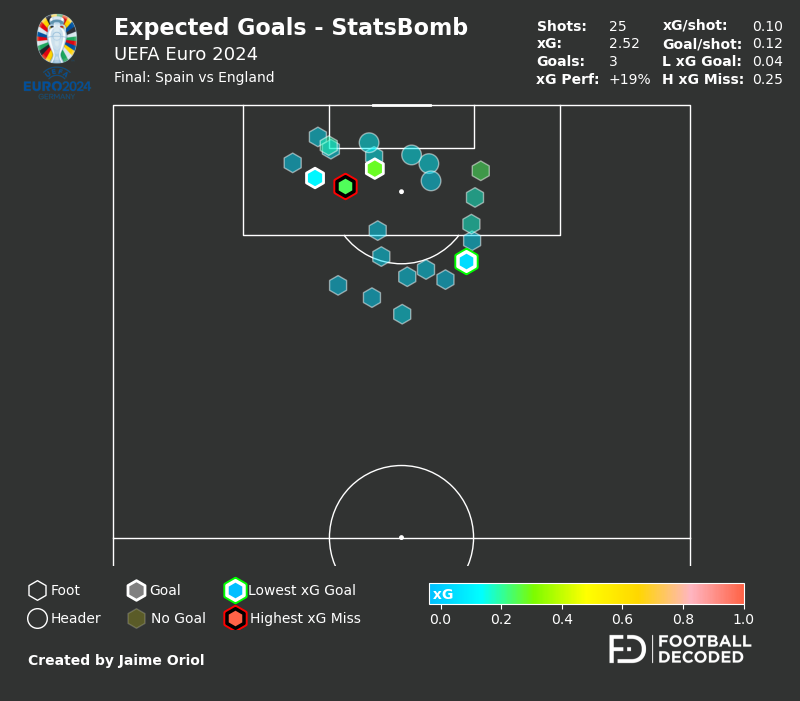

In [7]:
# Euro 2024 Final - StatsBomb Model (for comparison)
# Spain 2-1 England - July 14, 2024
from src.visualization.shot_xg import plot_shot_xg

# Filter to Euro 2024 final only
euro_final = predictions_df[predictions_df['match_id'] == 3943043]

fig = plot_shot_xg(
    predictions_df=euro_final,
    xg_column='statsbomb_xg',  # StatsBomb model
    logo_path='../src/logo/euro_2024.png',
    title_text='Expected Goals - StatsBomb',
    subtitle_text='UEFA Euro 2024',
    subsubtitle_text='Final: Spain vs England'
)
if fig:
    fig.savefig(output_dir / 'euro2024_final_sb_xg.png', dpi=300, facecolor='#313332', bbox_inches='tight')
    plt.show()
else:
    print('No shots found for Euro 2024 final')

Saved: ../outputs/article/distribution_plot.png


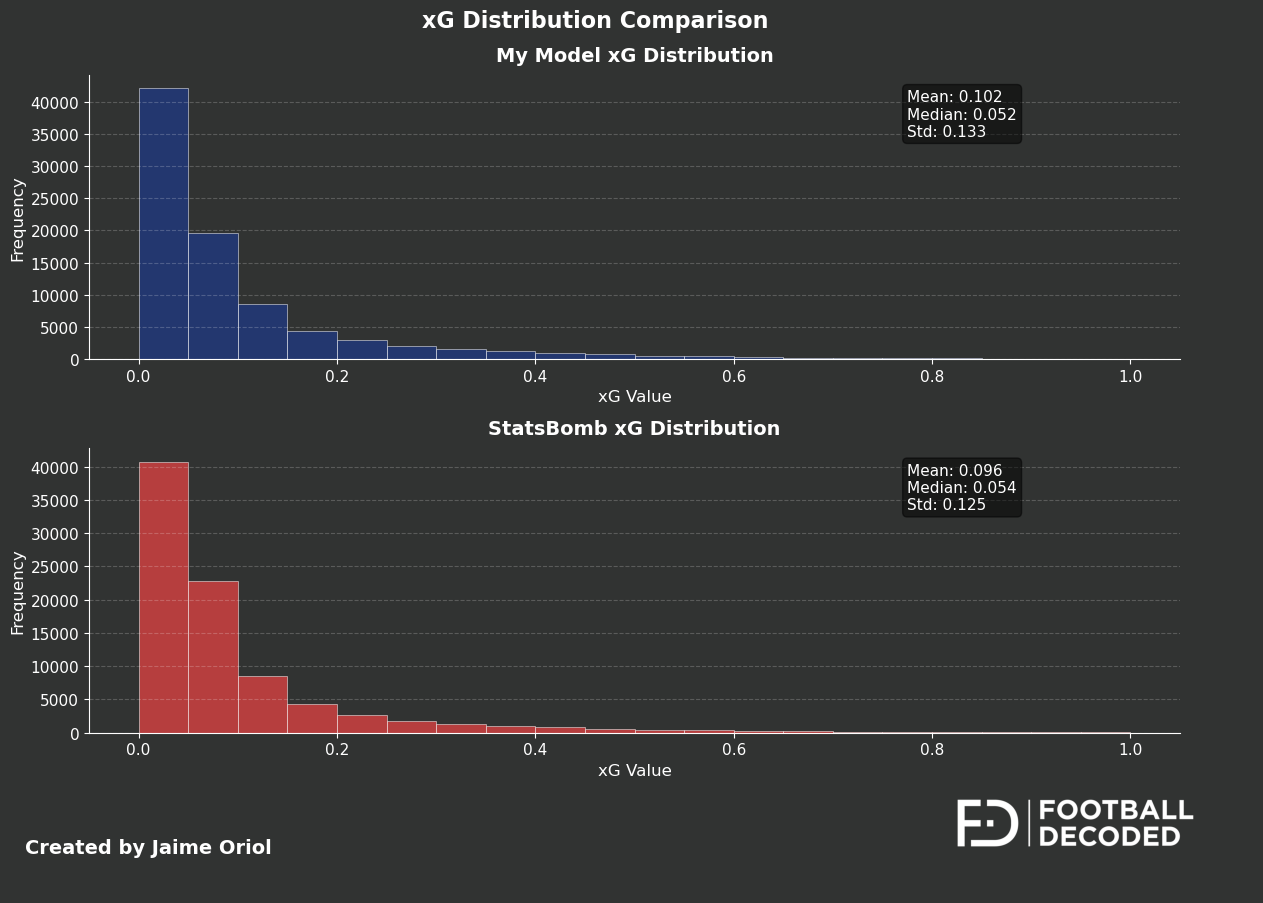

In [8]:
from src.visualization.distribution_plot import plot_distribution_comparison

fig = plot_distribution_comparison(
    predictions_df=predictions_df,
    output_path=output_dir / 'distribution_plot.png'
)
plt.show()

Saved: ../outputs/article/xg_heatmap.png


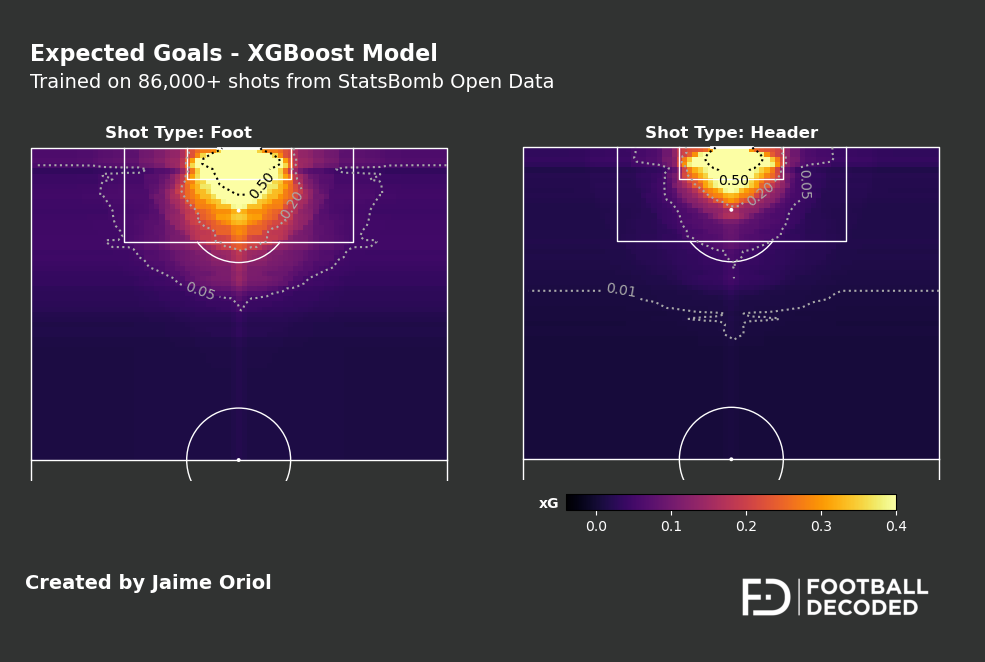

In [9]:
from src.visualization.xg_heatmap import plot_xg_heatmap

fig = plot_xg_heatmap(
    model_path='../models/phase2_tuned.json',
    features_path='../models/phase2_tuned_features.txt',
    output_path=output_dir / 'xg_heatmap.png'
)
plt.show()

In [10]:
print('All visualizations generated successfully!')
print(f'Output directory: {output_dir}')
print('\nGenerated files:')
for f in sorted(output_dir.glob('*.png')):
    print(f'  - {f.name}')

All visualizations generated successfully!
Output directory: ../outputs/article

Generated files:
  - comparison_scatter.png
  - distribution_plot.png
  - euro2024_final_fd_xg.png
  - euro2024_final_sb_xg.png
  - feature_importance.png
  - timeline_phases.png
  - xg_heatmap.png
